In [29]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math

In [30]:
dpi = 300

In [31]:
s_p1 = [97.45, 95818.8]
s_p2 = [-37.65, 13.3322]

s_slope = (s_p1[1] - s_p2[1])/(s_p1[0] - s_p2[0])
print(s_slope)

p_0 = s_p2[1] - s_slope*s_p2[0]
print(p_0)

def calc_pressure(u):
    return p_0 + u*s_slope

709.1448393782383
26712.635402590673


## Calibration plot

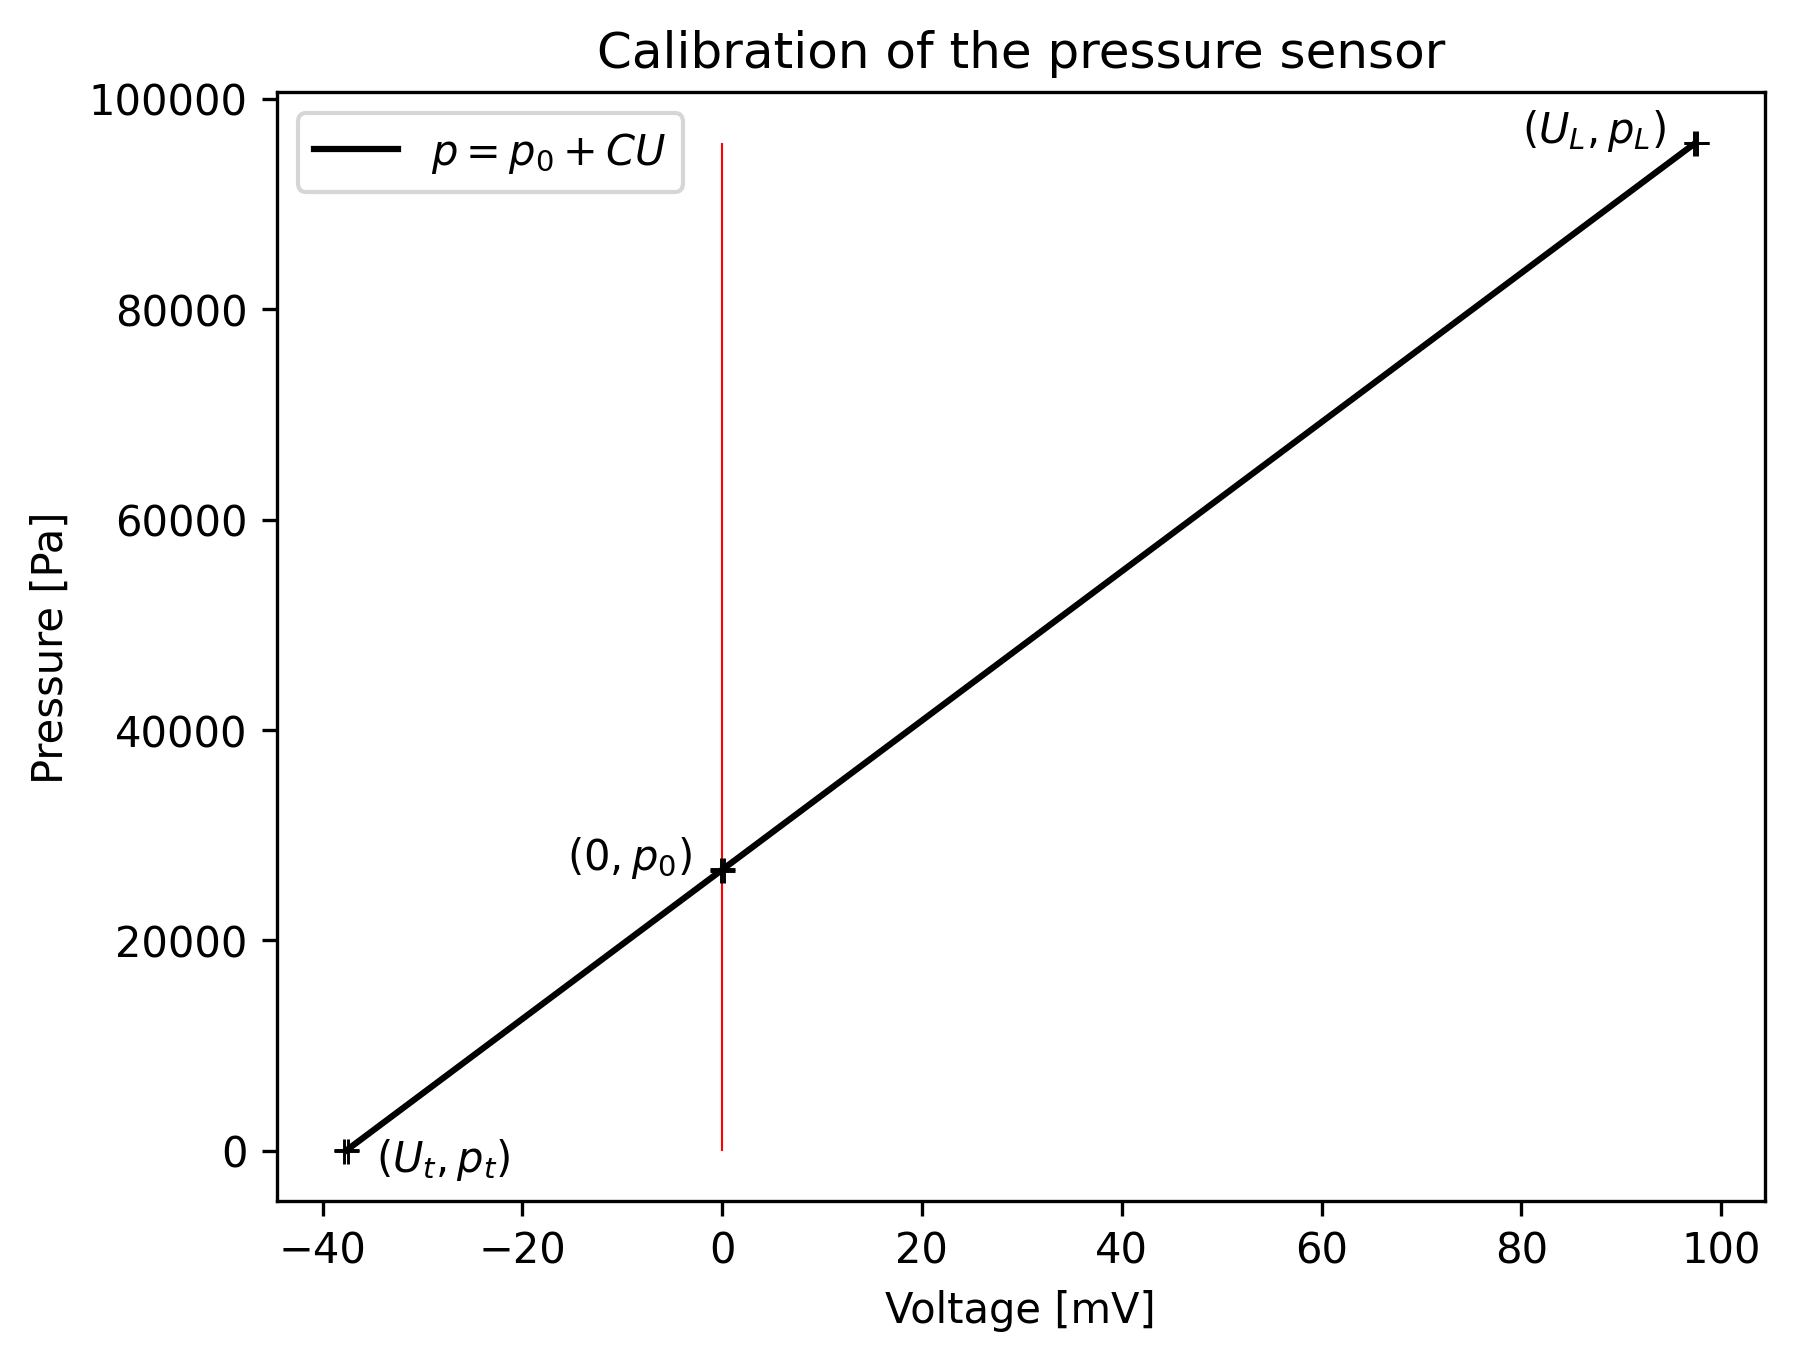

In [88]:
fig,ax1 = plt.subplots(dpi=dpi)

ax1.set_title('Calibration of the pressure sensor')
ax1.set_xlabel('Voltage [mV]')
ax1.set_ylabel('Pressure [Pa]')

dlta_U = 0.15508 #mV
dlta_p_L = 0 #Pa
dlta_p_T = 13.22 #Pa
dlta_p_0 = 119.001 #Pa

U = [s_p1[0], s_p2[0]]
P = [s_p1[1], s_p2[1]]

ax1.plot(U, P, c='black', marker = None, linestyle='-', label = '$p = p_0 + CU$')
ax1.vlines(0, P[0], P[1], colors='red', linestyle = '-', linewidth=0.5)

ax1.annotate("$(0, p_0)$", (-3, p_0), horizontalalignment='right')
ax1.errorbar([0], [p_0], xerr = dlta_U, yerr = dlta_p_0, ecolor = "black", capsize=3, markeredgewidth=0.7, elinewidth=1)

ax1.annotate("$(U_L, p_L)$", (U[0] - 3, P[0]), horizontalalignment='right')
ax1.errorbar(U[0], P[0], xerr = dlta_U, yerr = dlta_p_L, ecolor = "black", capsize=3, markeredgewidth=0.7, elinewidth=1)

ax1.annotate("$(U_t, p_t)$", (U[1] + 3, P[1] - 2000))
ax1.errorbar(U[1], P[1], xerr = dlta_U, yerr = dlta_p_T, ecolor = "black", capsize=3, markeredgewidth=0.7, elinewidth=1)

plt.legend()

In [33]:
M_K = [98.323, 96.96]
M_E = [0.0, 59.54]

M_K2 = [98.323, 95.64]
M_E2 = [0.0, 60.78] #60.52

In [34]:
P_K = calc_pressure(M_K[1])
P_E = calc_pressure(M_E[1])
print(P_K, P_E)

P_K2 = calc_pressure(M_K2[1]) #hot
P_E2 = calc_pressure(M_E2[1]) #cold
print(P_K2, P_E2)

95471.31902870466 68935.11913917099
94535.2478407254 69814.45874


In [35]:
def approx_t0(p_E, p_K, t_K):
    return -p_E/(p_K - p_E)*t_K

In [36]:
t_01 = approx_t0(P_E, P_K, M_K[0])
t_02 = approx_t0(P_E2, P_K2, M_K2[0])
print(t_01, t_02)

-255.4211886907752 -277.67588642595535


In [37]:
def calc_temperature(p_N, p_E, t0):
    return (1-p_N/p_E)*t0

In [38]:
M_N = [..., -9.98]
P_N = calc_pressure(M_N[1])
t_N = calc_temperature(P_N, P_E, t_02)
print(P_N)
print(t_N)

19635.369905595853
-198.58312772874564


In [39]:
t_L = 24
eps = 1*math.pow(10,-3)
gamm = 1*math.pow(10,-5)

a = (1 + eps)*P_E2 - (1 + eps + gamm*M_K[0])*P_K2
b = eps*(P_K2 - P_E2)*M_K[0] + (1 + gamm*M_K[0])*P_K2*t_L - P_E*(t_L + M_K[0])
c = P_E2*t_L*M_K[0]
print(a,b,c)

t_0a = (-b + math.sqrt(math.pow(b, 2) - 4*a*c))/2/a
print(t_0a)


-24838.459781560552 -6158843.210735026 164744808.64063248
-272.31266667436404


In [40]:
A = P_E2/(0 - t_0a) + eps*(P_E - P_N)/(t_L - t_0a)
t_Na = (A*t_0a + P_N)/(A - gamm*P_N)
print(t_Na)

-195.92414859772379


Text(88.323, 93535.2478407254, '$(t_K, p_K)$')

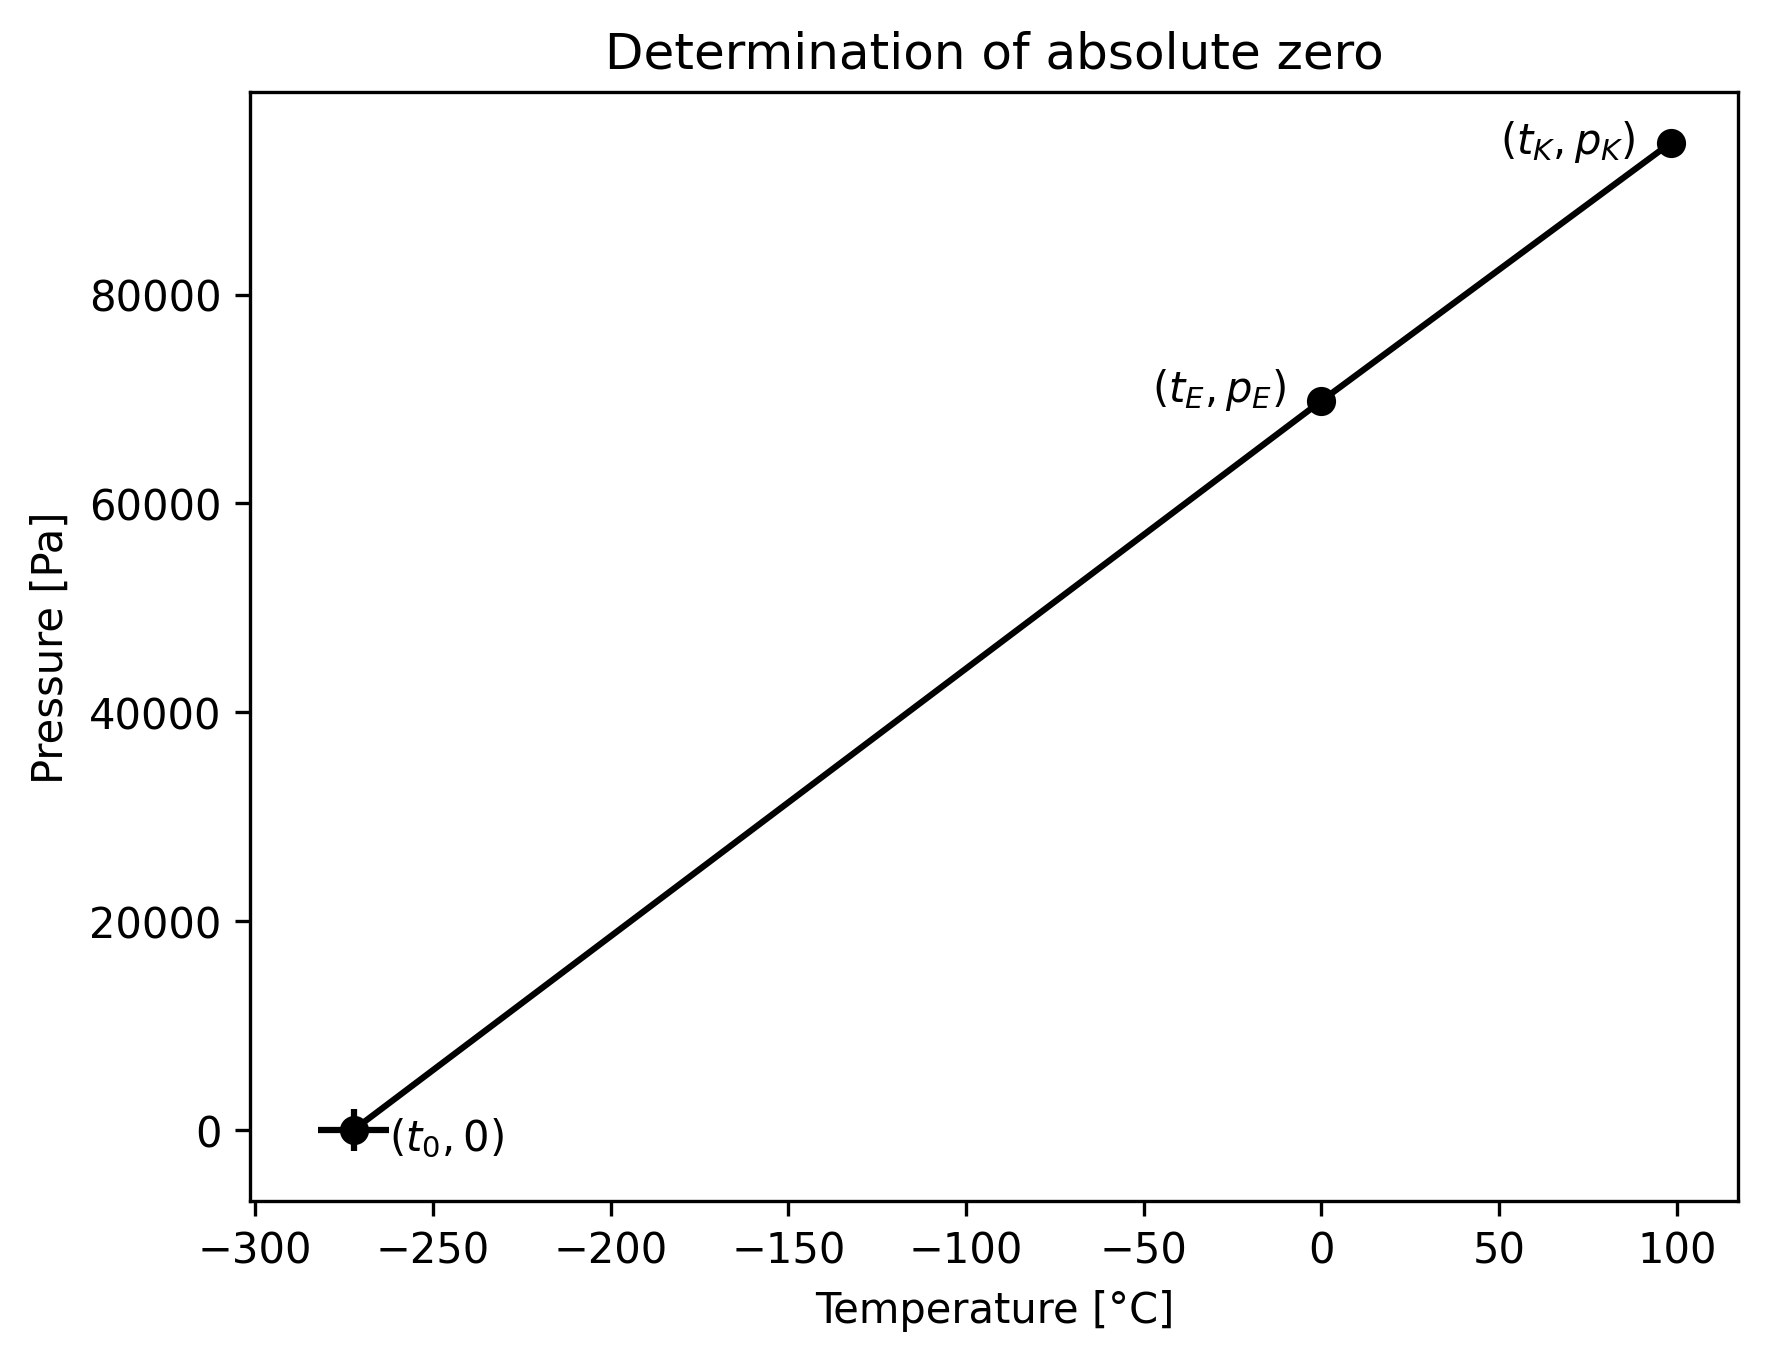

In [49]:
fig,ax1 = plt.subplots(dpi=dpi)

dlta_p_E = 176.6 #Pa
dlta_p_K = 196.1 #Pa

ax1.set_title('Determination of absolute zero')
# Linear fit through (t_E, p_E) and (t_K, p_K) until p = 0 is reached
ax1.set_xlabel('Temperature [°C]')
ax1.set_ylabel('Pressure [Pa]')

P = [0, P_E2, P_K2]
T = [t_0a, M_E2[0], M_K2[0]]

ax1.plot(T,P,c='black',linestyle='-', marker = 'o', label = 'adapt')
ax1.errorbar(T[0], P[0], xerr = 10, yerr = 2000, ecolor = "black")
ax1.annotate("$(t_0, 0)$", (T[0] + 10, P[0] - 2000))
ax1.annotate("$(t_E, p_E)$", (T[1] - 10, P[1]), horizontalalignment='right')
ax1.annotate("$(t_K, p_K)$", (T[2] - 10, P[2] - 1000), horizontalalignment='right')